# 2. Perceptron

Data de entrega: 14/09/2025 (última alteração 8 set.)

O enunciado da atividade está disponível neste [link](https://insper.github.io/ann-dl/versions/2025.2/exercises/perceptron/main).

### Utilitário

In [63]:
from utils import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Função de ativação
activation = lambda z: 1 if z >= 0 else 0

In [96]:
def shuffle_sample(sample_array, labels_array):
    lista = list(zip(sample_array, labels_array))
    random.shuffle(lista)

    features, labels = zip(*lista)
    return np.array(features), np.array(labels)

In [3]:
def confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    VP = np.sum((y_true == 1) & (y_pred == 1))  # verdadeiros positivos
    VN = np.sum((y_true == 0) & (y_pred == 0))  # verdadeiros negativos
    FP = np.sum((y_true == 0) & (y_pred == 1))  # falsos positivos
    FN = np.sum((y_true == 1) & (y_pred == 0))  # falsos negativos

    return np.array([[VN, FP],
                     [FN, VP]])

def accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(y_true == y_pred)

In [118]:
def forward(x, y, activation, n_epochs, eta=.01):
    W = np.array([[0, 0]])
    b = 0

    acc_array = []
    total_epochs = 0

    for i in range(n_epochs):
        print(f"[epoch {i+1}]: Starting...")

        total_epochs = i+1
        y_pred_vec = []
        updated = 0

        for j in range(x.shape[0]):
            z = np.dot(W, x[j].T) + b

            y_pred = activation(z)

            y_pred_vec.append(y_pred)

            error = y[j] - y_pred
            
            if error != 0:
                updated += 1
                W = W + eta * error * x[j]
                b = b + eta * error
        
        acc = accuracy(y, y_pred_vec)
        acc_array.append(acc)

        print(f"[epoch {i+1}] Accuracy: {acc}")

        if not updated:
            print(f"[epoch {i+1}] No updated detected...")

            break

    print(f"Training finished after {total_epochs} epochs")
    return W, b, y_pred_vec

## Exercício 1

In [2]:
class_0 = data.MultiDimensionData(mu=[1.5, 1.5],
                                  cov=[[0.5, 0], [0, 0.5]],
                                  n=1000)

class_1 = data.MultiDimensionData(mu=[5, 5],
                                  cov=[[0.5, 0], [0, 0.5]],
                                  n=1000)

In [3]:
sample_0 = class_0.sample_initialize()
sample_1 = class_1.sample_initialize()

In [4]:
# Criando vetor de features
x = np.concatenate((sample_0, sample_1))

In [5]:
# Criando vetor de labels
label_0 = np.zeros(1000, dtype=int)
label_1 = np.ones(1000, dtype=int)

y = np.concatenate((label_0, label_1))

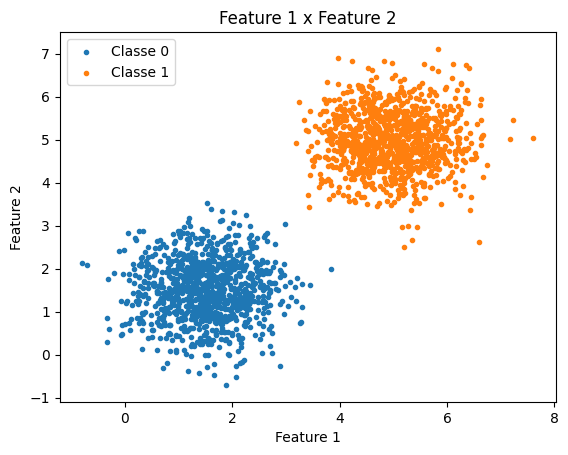

In [6]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Classe 0", marker=".")
plt.scatter(x[y==1, 0], x[y==1, 1], label="Classe 1", marker=".")

plt.title("Feature 1 x Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()

In [9]:
W, b, y_pred_vec = forward(x, y, activation, 100)

Iniciando epoch 1
Iniciando epoch 2
Iniciando epoch 3
Iniciando epoch 4
Iniciando epoch 5
Iniciando epoch 6
Iniciando epoch 7
Iniciando epoch 8
Iniciando epoch 9
Iniciando epoch 10
Iniciando epoch 11
Iniciando epoch 12
Iniciando epoch 13
Iniciando epoch 14
Iniciando epoch 15
Iniciando epoch 16
Iniciando epoch 17
Iniciando epoch 18
Iniciando epoch 19
Iniciando epoch 20
Iniciando epoch 21
Iniciando epoch 22
Iniciando epoch 23
Iniciando epoch 24
Iniciando epoch 25
Iniciando epoch 26
Iniciando epoch 27
Iniciando epoch 28
Iniciando epoch 29
Iniciando epoch 30
Iniciando epoch 31
Iniciando epoch 32
Iniciando epoch 33
Iniciando epoch 34


In [10]:
from itertools import chain

flatten = list(chain.from_iterable(x))

x1 = np.linspace(min(flatten), max(flatten), 2000)

W = list(chain.from_iterable(W))

x2 = -(W[0] * x1 + b) / W[1]

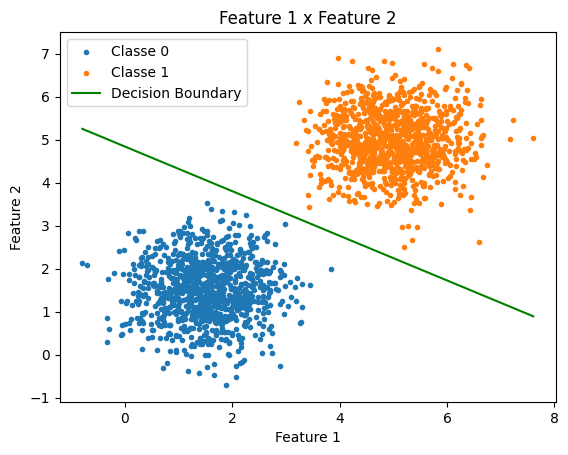

In [11]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Classe 0", marker=".")
plt.scatter(x[y==1, 0], x[y==1, 1], label="Classe 1", marker=".")
plt.plot(x1, x2, color="green", label="Decision Boundary")

plt.title("Feature 1 x Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()

---

### Calculando acurácia

In [12]:
correct = 0
incorrect = 0

for i in (y_pred_vec == y):
    if i:
        correct += 1
    else:
        incorrect += 1

In [13]:
accuracy = correct / (correct + incorrect)

In [14]:
accuracy

1.0

## Exercício 2

In [109]:
N = 1000

In [110]:
class_0 = data.MultiDimensionData(mu=[3, 3],
                                  cov=[[1.5, 0], [0, 1.5]],
                                  n=N)

class_1 = data.MultiDimensionData(mu=[4, 4],
                                  cov=[[1.5, 0], [0, 1.5]],
                                  n=N)

In [111]:
sample_0 = class_0.sample_initialize()
sample_1 = class_1.sample_initialize()

In [112]:
# Criando vetor de features
x = np.concatenate((sample_0, sample_1))

In [113]:
# Criando vetor de labels
label_0 = np.zeros(N, dtype=int)
label_1 = np.ones(N, dtype=int)

y = np.concatenate((label_0, label_1))

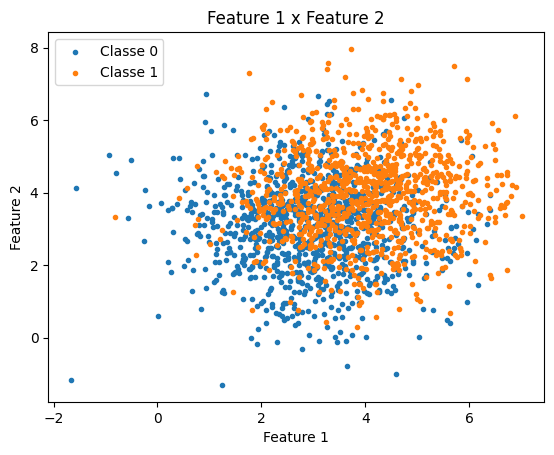

In [114]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Classe 0", marker=".")
plt.scatter(x[y==1, 0], x[y==1, 1], label="Classe 1", marker=".")

plt.title("Feature 1 x Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()

In [119]:
features_2, labels_2 = shuffle_sample(sample_array=x, labels_array=y)

In [120]:
W_2, b_2, ypred_vec_2 = forward(features_2, labels_2, activation, 100)

[epoch 1]: Starting...
[epoch 1] Accuracy: 0.581
[epoch 2]: Starting...
[epoch 2] Accuracy: 0.632
[epoch 3]: Starting...
[epoch 3] Accuracy: 0.6205
[epoch 4]: Starting...
[epoch 4] Accuracy: 0.62
[epoch 5]: Starting...
[epoch 5] Accuracy: 0.6135
[epoch 6]: Starting...
[epoch 6] Accuracy: 0.625
[epoch 7]: Starting...
[epoch 7] Accuracy: 0.6255
[epoch 8]: Starting...
[epoch 8] Accuracy: 0.623
[epoch 9]: Starting...
[epoch 9] Accuracy: 0.6215
[epoch 10]: Starting...
[epoch 10] Accuracy: 0.6265
[epoch 11]: Starting...
[epoch 11] Accuracy: 0.6135
[epoch 12]: Starting...
[epoch 12] Accuracy: 0.619
[epoch 13]: Starting...
[epoch 13] Accuracy: 0.6145
[epoch 14]: Starting...
[epoch 14] Accuracy: 0.621
[epoch 15]: Starting...
[epoch 15] Accuracy: 0.6175
[epoch 16]: Starting...
[epoch 16] Accuracy: 0.612
[epoch 17]: Starting...
[epoch 17] Accuracy: 0.614
[epoch 18]: Starting...
[epoch 18] Accuracy: 0.617
[epoch 19]: Starting...
[epoch 19] Accuracy: 0.6195
[epoch 20]: Starting...
[epoch 20] Accura

In [121]:
conf_matrix = confusion_matrix(y, ypred_vec_2)

In [122]:
conf_matrix


array([[513, 487],
       [487, 513]])

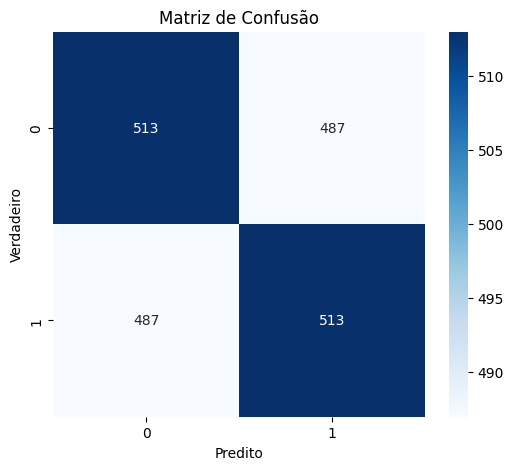

In [123]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

In [124]:
from itertools import chain

flatten = list(chain.from_iterable(x))

x_boundary = np.linspace(min(flatten), max(flatten), 2000)

W_2 = list(chain.from_iterable(W_2))

x2 = -(W_2[0] * x_boundary + b_2) / W_2[1]

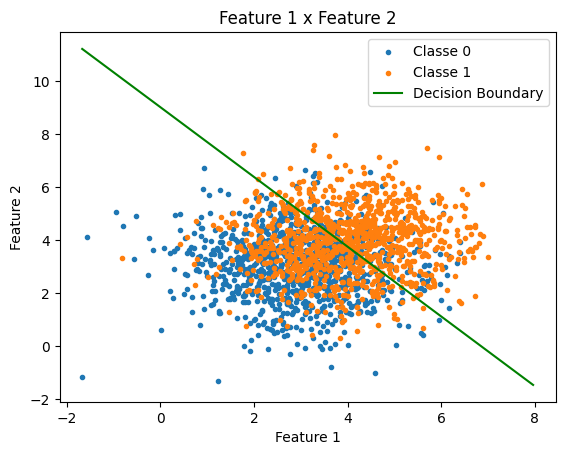

In [125]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Classe 0", marker=".")
plt.scatter(x[y==1, 0], x[y==1, 1], label="Classe 1", marker=".")
plt.plot(x_boundary, x2, color="green", label="Decision Boundary")

plt.title("Feature 1 x Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.show()

---

### Calculando acurácia